# DATA COLLECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [29]:
df=pd.read_csv('IRIS.csv')
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# DATA PREPROCESSING

In [30]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.tail()


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.size

750

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.duplicated().sum()


3

In [11]:
df.drop_duplicates()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.sample(10)


,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,Iris-setosa
136,6.3,3.4,5.6,2.4,Iris-virginica
70,5.9,3.2,4.8,1.8,Iris-versicolor
48,5.3,3.7,1.5,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
103,6.3,2.9,5.6,1.8,Iris-virginica
30,4.8,3.1,1.6,0.2,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica


In [13]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# DATA EXPLORATORY

In [14]:
print(df["species"].nunique())
df["species"].unique()


3


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

sepal_length       AxesSubplot(0.125,0.11;0.168478x0.77)
sepal_width     AxesSubplot(0.327174,0.11;0.168478x0.77)
petal_length    AxesSubplot(0.529348,0.11;0.168478x0.77)
petal_width     AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

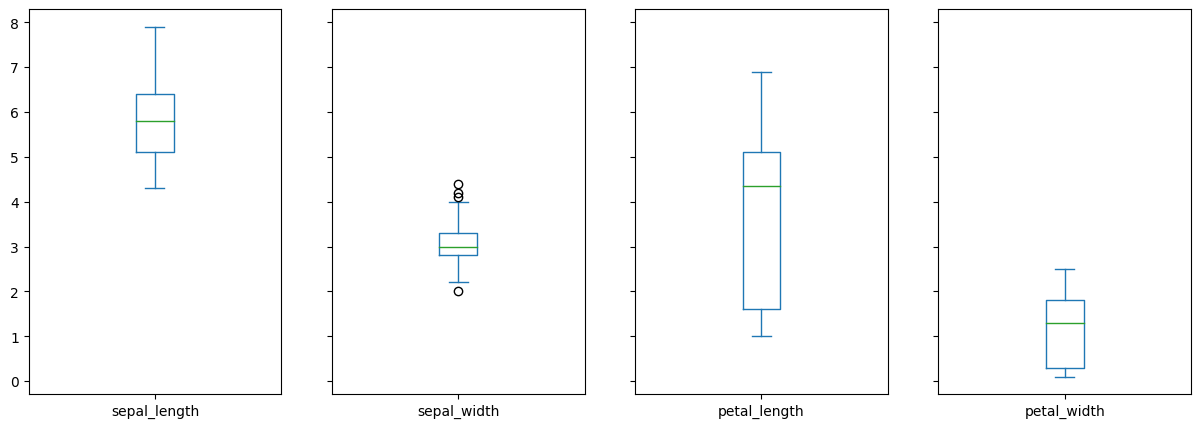

In [15]:
df.plot(kind='box',subplots='True',sharey='False',figsize=(15,5))


In [16]:
IQR=df['sepal_width'].quantile(0.75)-df['sepal_width'].quantile(0.25)
lower_limit=df['sepal_width'].quantile(0.25)-(IQR*1.5)
upper_limit=df['sepal_width'].quantile(0.75)+(IQR*1.5)


In [17]:
df['sepal_width']=pd.DataFrame(np.where(df['sepal_width']>upper_limit,upper_limit,np.where(df['sepal_width']<lower_limit,lower_limit,df['sepal_width'])))


<AxesSubplot:>

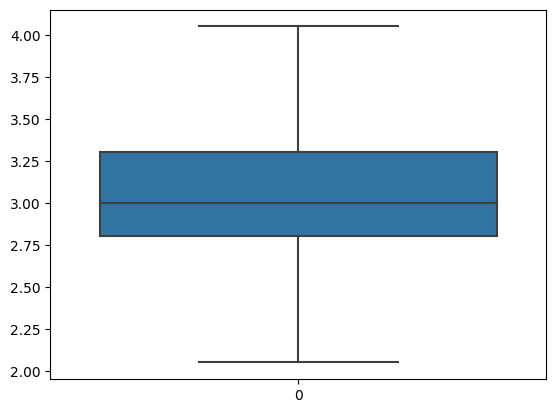

In [18]:
sns.boxplot(df['sepal_width'])


In [19]:
df['species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

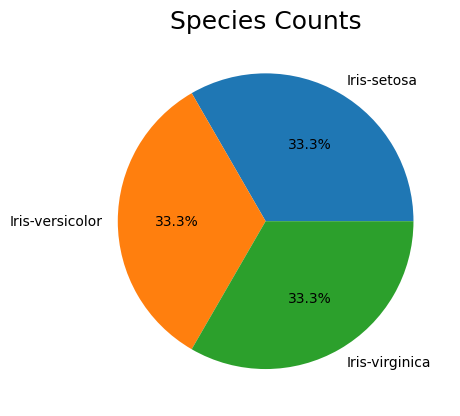

In [20]:
count =  df.species.value_counts()
label = df.species.unique().tolist()

# Pie Chart
plt.pie(count, labels=label,  autopct='%1.1f%%')
plt.title("Species Counts", fontsize=18)
plt.show()


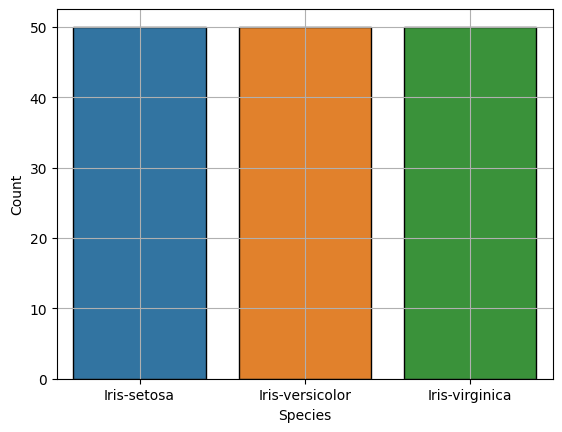

In [21]:
sns.countplot(data=df, x='species', ec='black')
plt.xlabel("Species")
plt.ylabel("Count")
plt.grid(True)
plt.show()


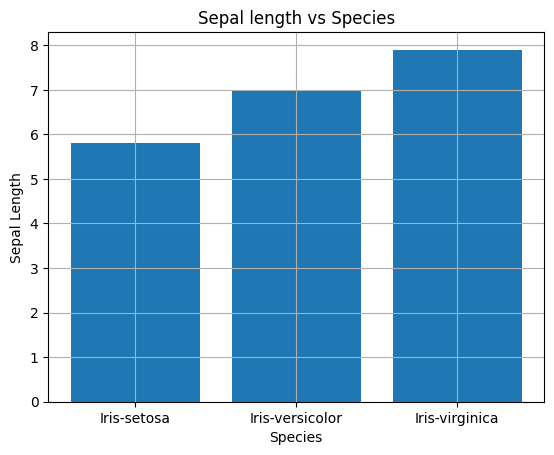

In [22]:
plt.bar(df['species'],df['sepal_length'])
plt.title("Sepal length vs Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.grid(True)
plt.show()


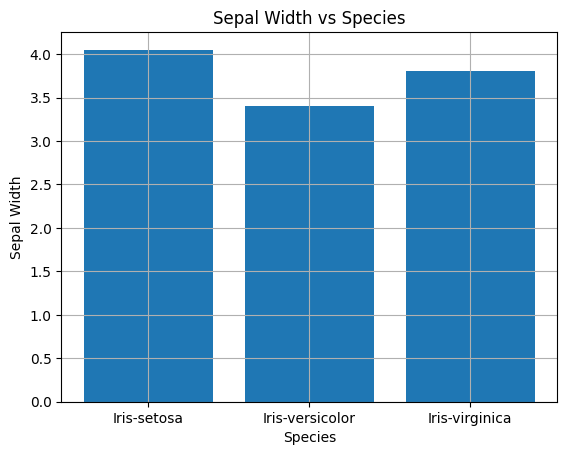

In [23]:
plt.bar(df['species'],df['sepal_width'])
plt.title("Sepal Width vs Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()


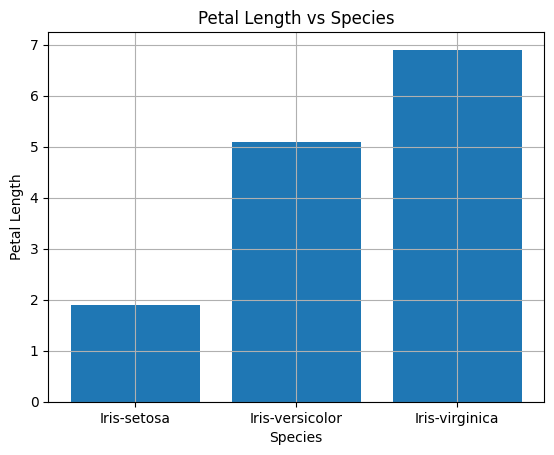

In [24]:
plt.bar(df['species'],df['petal_length'])
plt.title("Petal Length vs Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()


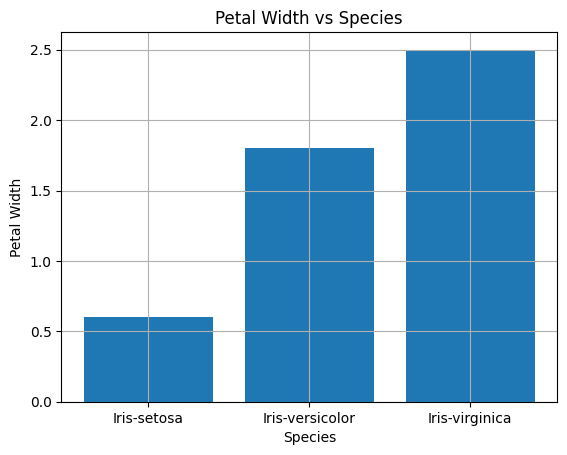

In [25]:
plt.bar(df['species'],df['petal_width'])
plt.title("Petal Width vs Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()


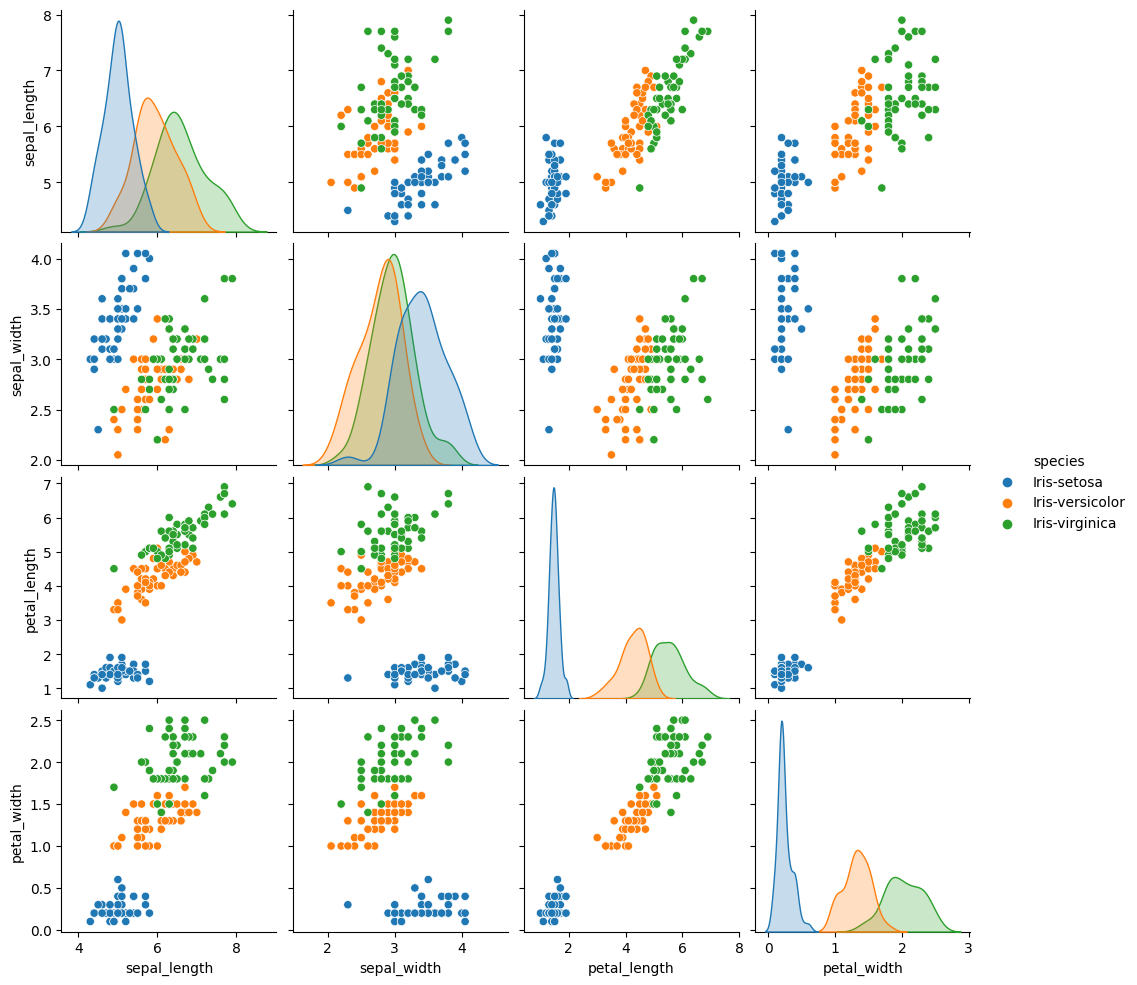

In [26]:
sns.pairplot(df,hue="species")


In [40]:
numeric_iris=df.drop("species",axis=1)
numeric_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


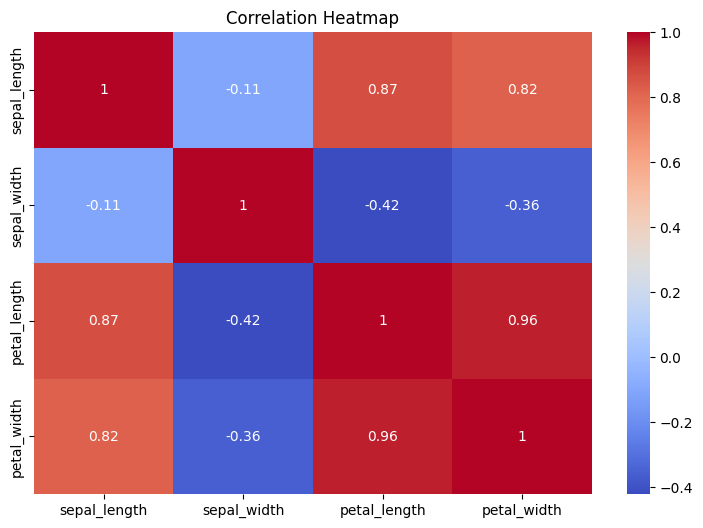

In [42]:
correlation_matrix=numeric_iris.corr()
plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## FEATURE ENGINEERING

In [32]:
x = df.iloc[:,:4]
x


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
y = df.iloc[:,4]
y


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

### SPLITTING THE DATA INTO TEST AND TRAIN DATASET

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)


In [35]:
x_train.shape

(112, 4)

In [36]:
x_test.shape

(38, 4)

In [38]:
y_train.shape

(112,)

In [37]:
y_test.shape

(38,)

# MODEL BUILDING

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)


### Prediction

In [44]:
y_pred = model.predict(x_test)
y_pred


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Confusion matrix

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix

confusion_matrix(y_test,y_pred)


array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

### Accuracy Score

In [47]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}%".format(accuracy))


Accuracy of the model is 97.37%


## Prediction of Species

In [48]:
x_new = np.array([[5.2,3.5,1.5,0.2],[1.9,2.2,3.8,1.1],[3.2,2.5,4.6,1.9]])
pred = model.predict(x_new)
print(f"{pred}")

# Preventing warning to be printed on output cell
import warnings
warnings.filterwarnings("ignore")


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


c:\users\bijin\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### Random-Forest Classification

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [50]:
y=df.iloc[:,-1]
x=df.iloc[:,[0,1,2,3]]


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [53]:
rmodel=RandomForestClassifier(n_estimators=100,random_state=42)
rmodel.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [54]:
y_pred=rmodel.predict(x_test)


In [66]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}%".format(accuracy))


Accuracy of the model is 100.00%


In [67]:
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [68]:
print(confusion_matrix(y_test,y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Decision Tree

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [72]:
dmodel=DecisionTreeClassifier(random_state=42)
dmodel.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [73]:
y_pred=dmodel.predict(x_test)
y_pred


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [74]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}%".format(accuracy))


Accuracy of the model is 100.00%


In [75]:
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [76]:
print(confusion_matrix(y_test,y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Support Vector Machine

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [79]:
smodel=SVC(kernel='linear', C=1,random_state=42)
smodel.fit(x_train,y_train)


SVC(C=1, kernel='linear', random_state=42)

In [80]:
y_pred=smodel.predict(x_test)
y_pred


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [81]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}%".format(accuracy))


Accuracy of the model is 100.00%


In [82]:
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [83]:
print(confusion_matrix(y_test,y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## CONCLUSION:

* In this task, I took Iris Flower dataset and performed Logistic Regression Algorithm to make model.
* It finally categorized flowers into species.
* I got an accuracy of 97.37% (Logistic Regression) and It demonstrates that the model I created is extremely accurate.
   - Decision tree gives 100% accuracy
   - Random Forest gives 100% accuracy
   - SVM also predicts with 100% acuuracy
* And I predicted the Species using a fresh set of data and obtained an accurate result.